# Explore here

In [518]:
# Your code here

In [519]:
import os
import pandas as pd
import csv

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

os.makedirs("/workspaces/regularized-linear-regression/data/raw", exist_ok = True)
file_path = os.path.join("/workspaces/regularized-linear-regression/data/raw", "demographic_health_data.csv")

df.to_csv(file_path, index=False)

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [520]:
df.shape

(3140, 108)

In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [522]:
for col in df:
    print(f'{col} --> {df[col].dtype}')

fips --> int64
TOT_POP --> int64
0-9 --> int64
0-9 y/o % of total pop --> float64
19-Oct --> int64
10-19 y/o % of total pop --> float64
20-29 --> int64
20-29 y/o % of total pop --> float64
30-39 --> int64
30-39 y/o % of total pop --> float64
40-49 --> int64
40-49 y/o % of total pop --> float64
50-59 --> int64
50-59 y/o % of total pop --> float64
60-69 --> int64
60-69 y/o % of total pop --> float64
70-79 --> int64
70-79 y/o % of total pop --> float64
80+ --> int64
80+ y/o % of total pop --> float64
White-alone pop --> int64
% White-alone --> float64
Black-alone pop --> int64
% Black-alone --> float64
Native American/American Indian-alone pop --> int64
% NA/AI-alone --> float64
Asian-alone pop --> int64
% Asian-alone --> float64
Hawaiian/Pacific Islander-alone pop --> int64
% Hawaiian/PI-alone --> float64
Two or more races pop --> int64
% Two or more races --> float64
POP_ESTIMATE_2018 --> int64
N_POP_CHG_2018 --> int64
GQ_ESTIMATES_2018 --> int64
R_birth_2018 --> float64
R_death_2018 --

- There are two object type columns (**"COUNTY_NAME"** and **"STATE_NAME"**) so we'll factorize these two
- Yeah, no... I'm not dropping columns by hand here. I'll let SelectKBest take care of choosing the best columns to reduce the dataframe.
- Our target will be **"Heart disease_number"** for the ammount of people affected by a heart disease given the gravity of such disease over others like obesity or diabetes.

In [523]:
print(f'{df["COUNTY_NAME"]} {df["STATE_NAME"]}')

0          Autauga
1          Baldwin
2          Barbour
3             Bibb
4           Blount
           ...    
3135    Sweetwater
3136         Teton
3137         Uinta
3138      Washakie
3139        Weston
Name: COUNTY_NAME, Length: 3140, dtype: object 0       Alabama
1       Alabama
2       Alabama
3       Alabama
4       Alabama
         ...   
3135    Wyoming
3136    Wyoming
3137    Wyoming
3138    Wyoming
3139    Wyoming
Name: STATE_NAME, Length: 3140, dtype: object


- **FACTORIZING**

In [524]:
factorized_df = df.copy()

factorized_df["COUNTY_NAME_n"] = pd.factorize(factorized_df["COUNTY_NAME"])[0]
factorized_df["STATE_NAME_n"] = pd.factorize(factorized_df["STATE_NAME"])[0]
factorized_df = factorized_df.drop(columns=['COUNTY_NAME', 'STATE_NAME'])

print(f'{factorized_df["COUNTY_NAME_n"]} {factorized_df["STATE_NAME_n"]}')

0          0
1          1
2          2
3          3
4          4
        ... 
3135    1837
3136     481
3137    1838
3138    1839
3139    1840
Name: COUNTY_NAME_n, Length: 3140, dtype: int64 0        0
1        0
2        0
3        0
4        0
        ..
3135    50
3136    50
3137    50
3138    50
3139    50
Name: STATE_NAME_n, Length: 3140, dtype: int64


In [525]:
print(f'Duplicate rows: {factorized_df.duplicated().sum()}')
factorized_df.value_counts()

Duplicate rows: 0


fips   TOT_POP  0-9    0-9 y/o % of total pop  19-Oct  10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  30-39 y/o % of total pop  40-49  40-49 y/o % of total pop  50-59  50-59 y/o % of total pop  60-69  60-69 y/o % of total pop  70-79  70-79 y/o % of total pop  80+   80+ y/o % of total pop  White-alone pop  % White-alone  Black-alone pop  % Black-alone  Native American/American Indian-alone pop  % NA/AI-alone  Asian-alone pop  % Asian-alone  Hawaiian/Pacific Islander-alone pop  % Hawaiian/PI-alone  Two or more races pop  % Two or more races  POP_ESTIMATE_2018  N_POP_CHG_2018  GQ_ESTIMATES_2018  R_birth_2018  R_death_2018  R_NATURAL_INC_2018  R_INTERNATIONAL_MIG_2018  R_DOMESTIC_MIG_2018  R_NET_MIG_2018  Less than a high school diploma 2014-18  High school diploma only 2014-18  Some college or associate's degree 2014-18  Bachelor's degree or higher 2014-18  Percent of adults with less than a high school diploma 2014-18  Percent of adults with a high school diploma only 

There are no duplicates in the dataframe

In [526]:
factorized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_n
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


- **SPLITTING INTO TRAIN AND TEST**

In [527]:

from sklearn.model_selection import train_test_split

scaled_df = factorized_df.copy()

X = scaled_df.drop("Heart disease_number", axis = 1)
y = scaled_df["Heart disease_number"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,COUNTY_NAME_n,STATE_NAME_n
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,12.6,14.9,2823,3.8,3.5,4.1,771,6,879,22
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,11.9,14.2,5416,3.5,3.2,3.8,1454,5,1404,38
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,11.2,13.1,3698,2.9,2.7,3.1,871,2,327,14
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,10.4,12.0,7913,3.0,2.8,3.2,2118,3,1350,36
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,11.7,13.4,12987,3.4,3.2,3.6,3490,4,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,55093,42555,4478,10.522853,6520,15.321349,6989,16.423452,4822,11.331218,...,7.3,8.7,2699,2.5,2.3,2.7,838,2,413,49
1095,21209,56031,7624,13.606753,7993,14.265317,7669,13.687066,7740,13.813782,...,10.2,12.0,4670,2.6,2.4,2.8,1094,3,155,17
1130,22039,33443,4680,13.993960,4568,13.659062,4778,14.286996,4199,12.555692,...,15.0,16.9,3999,4.0,3.8,4.3,1013,6,763,18
1294,26131,5795,331,5.711821,493,8.507334,335,5.780846,379,6.540121,...,14.6,17.7,816,4.5,4.2,5.0,229,6,881,22


- **APPLYING MIN-MAX SCALING AND SELECTING BEST COLUMNS**

In [528]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import MinMaxScaler

selection_model = SelectKBest(f_regression, k = 20)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]

X_train_selected = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_selected = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

#
#   SCALING
#
scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), index = X_train.index, columns = X_train_selected.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected), index = X_test.index, columns = X_test_selected.columns)

y_train = pd.Series(y_train, index = X_train.index)
y_test = pd.Series(y_test, index=X_test.index)

print(selected_columns)
print(f'X_test_scaled: {X_test_scaled}')


Index(['TOT_POP', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop',
       'POP_ESTIMATE_2018', 'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Civilian_labor_force_2018', 'Employed_2018', 'Total Population',
       'Population Aged 60+', 'county_pop2018_18 and older',
       'anycondition_number', 'Obesity_number', 'COPD_number',
       'diabetes_number', 'CKD_number'],
      dtype='object')
X_test_scaled:        TOT_POP     40-49     50-59     60-69     70-79       80+  \
2893  0.000886  0.000896  0.000959  0.001079  0.001378  0.001620   
2968  0.026690  0.022145  0.026777  0.034480  0.037981  0.027445   
1064  0.001714  0.001792  0.001779  0.001865  0.002332  0.001476   
1231  0.011602  0.010526  0.012865  0.014825  0.014752  0.011497   
2987  0.022324  0.018823  0.020179  0.027425  0.030236  0.023224   
...        ...       ...       ...       ...       ...       ...   
1351  0.002811  0.002592  0.003165  0.003520  0.0037

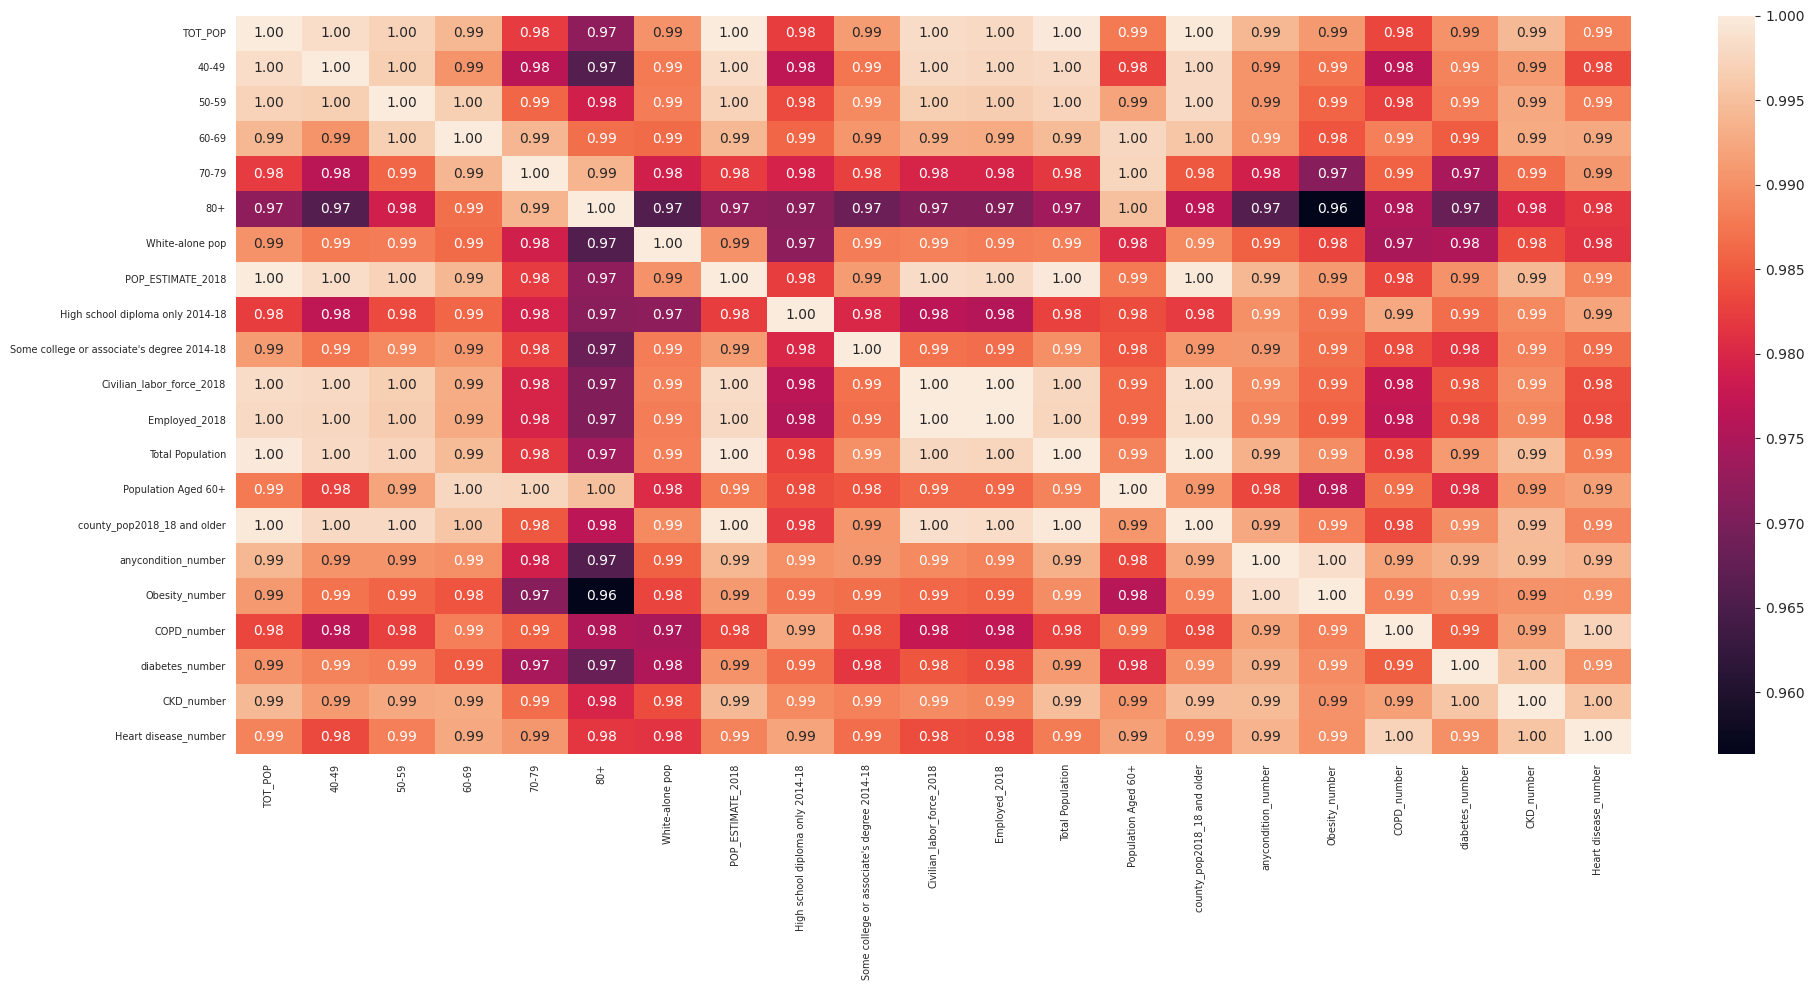

In [529]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = X_train_scaled.copy()
df_corr['Heart disease_number'] = y_train 
corr_matrix = df_corr.corr()

fig, axes = plt.subplots(figsize = (20, 10))

sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

In [530]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [531]:
y_pred = model.predict(X_test_scaled)
y_pred

array([7.38261671e+02, 1.30033500e+04, 1.74154157e+03, 6.83653400e+03,
       1.08293748e+04, 1.35851167e+03, 7.32897092e+02, 1.35260086e+03,
       3.60059444e+02, 6.75293815e+02, 1.26432986e+03, 2.18722148e+02,
       4.19129973e+03, 1.38883164e+03, 9.22513666e+03, 2.56953645e+03,
       5.33072609e+04, 1.21386452e+03, 1.95918254e+03, 4.06192694e+02,
       1.61405779e+03, 6.86939621e+02, 8.27741339e+02, 6.01242435e+02,
       9.79874123e+04, 2.53922683e+03, 8.16620519e+02, 2.09326397e+03,
       8.46893118e+02, 1.84400098e+02, 1.18236297e+03, 1.82646837e+03,
       2.80187094e+03, 3.08866061e+03, 8.86590201e+03, 1.55353541e+03,
       2.68015848e+03, 1.19678153e+03, 8.60411274e+02, 1.69285615e+03,
       1.43938717e+03, 9.10812691e+03, 3.58781571e+02, 1.37684640e+02,
       2.68851114e+03, 7.09258598e+02, 3.19205374e+02, 7.65786720e+03,
       1.10011857e+03, 7.53283688e+02, 1.83500791e+04, 3.24056778e+02,
       1.31526750e+03, 5.35813880e+02, 8.56310473e+03, 7.51468854e+02,
      

In [532]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 195560.7663858894
R2 Score: 0.9977656703725453


In [533]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 300)
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso}")
print(f"Lasso R2 Score: {r2_lasso}")

Lasso MSE: 19226429.850969322
Lasso R2 Score: 0.780333332497618


/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.090e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


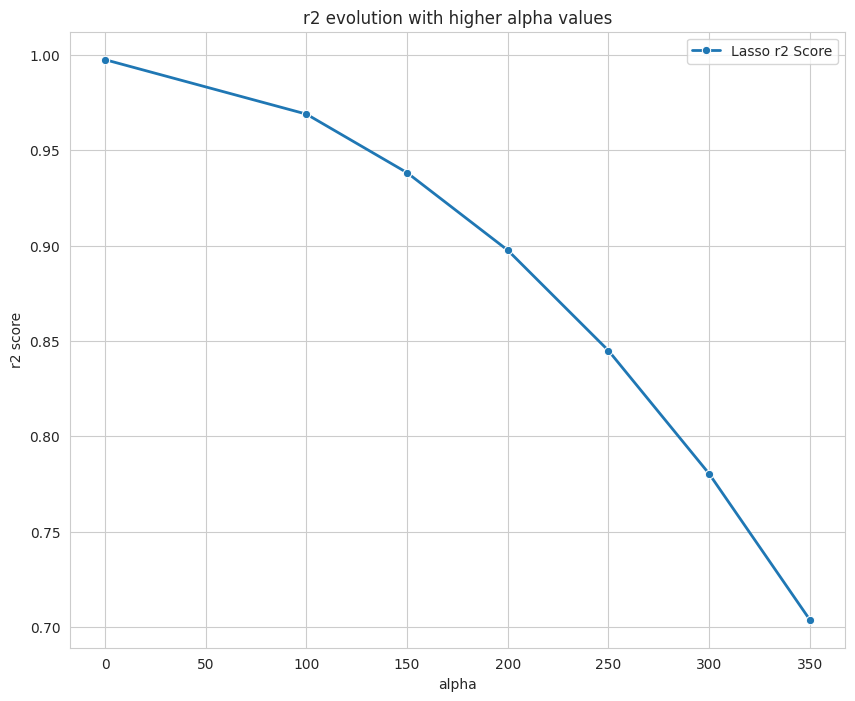

In [534]:

alpha_list = [0.1, 100, 150, 200, 250, 300, 350] # SMALLER VALUES GIVE ME THE SAME RESULTS, I'VE TRIED TO USE VALUES FROM 0.0 TO 20 AND HAD PRETTY MUCH THE SAME RESULT, SAME FROM 0.0 TO 100
r2_scores = []

for num in alpha_list:
    lasso_model = Lasso(alpha = num)
    lasso_model.fit(X_train_scaled, y_train)
    r2_scores.append(r2_score(y_test, lasso_model.predict(X_test_scaled)))

sns.set_style("whitegrid")

plt.figure(figsize = (10, 8))

sns.lineplot(x=alpha_list, y=r2_scores, marker='o', label="Lasso r2 Score", linewidth=2)

plt.xlabel("alpha")
plt.ylabel("r2 score")
plt.title("r2 evolution with higher alpha values")
plt.legend()
plt.show()